<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/SitiMildaAlkanDawasoka_2226270025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soal Nomor 1
a. Membuat Gambar Grayscale dari Link :

In [81]:
# get image from link google image
import urllib.request
urllib.request.urlretrieve(
    'https://img.freepik.com/free-photo/closeup-grayscale-shot-american-bald-eagle-dark-background_181624-31795.jpg', 'bird.jpg'
), # link from google image

# img = Image.open("gfg.png") #load image filename

(('bird.jpg', <http.client.HTTPMessage at 0x7ce2f706ff10>),)

Resolusi gambar: 417x626 piksel


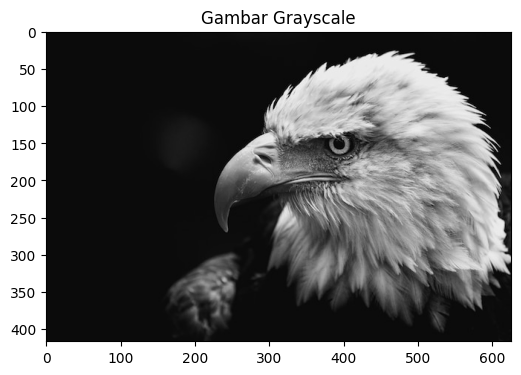

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('bird.jpg', cv2.IMREAD_GRAYSCALE)

# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

b. Histogram Equalization

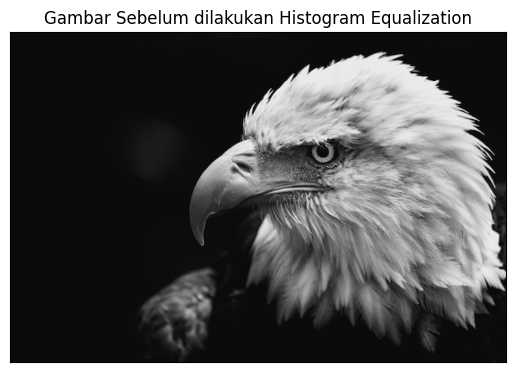

In [83]:
ref = cv2.imread('bird.jpg')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('Gambar Sebelum dilakukan Histogram Equalization')
plt.xticks([])
plt.yticks([])
plt.show()

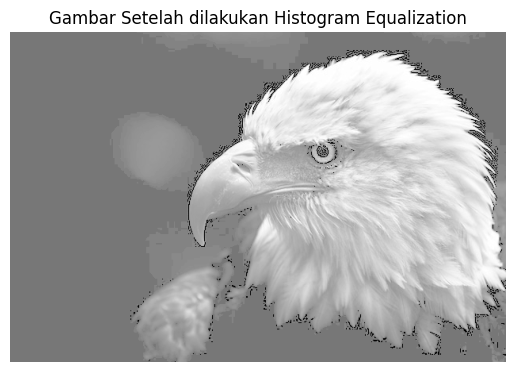

In [84]:
import cv2
import matplotlib.pyplot as plt

# Load the image using cv2.imread
img = cv2.imread('bird.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply histogram equalization
equ = cv2.equalizeHist(img)  # Pass the image array, not the file path

plt.title('Gambar Setelah dilakukan Histogram Equalization')
plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()


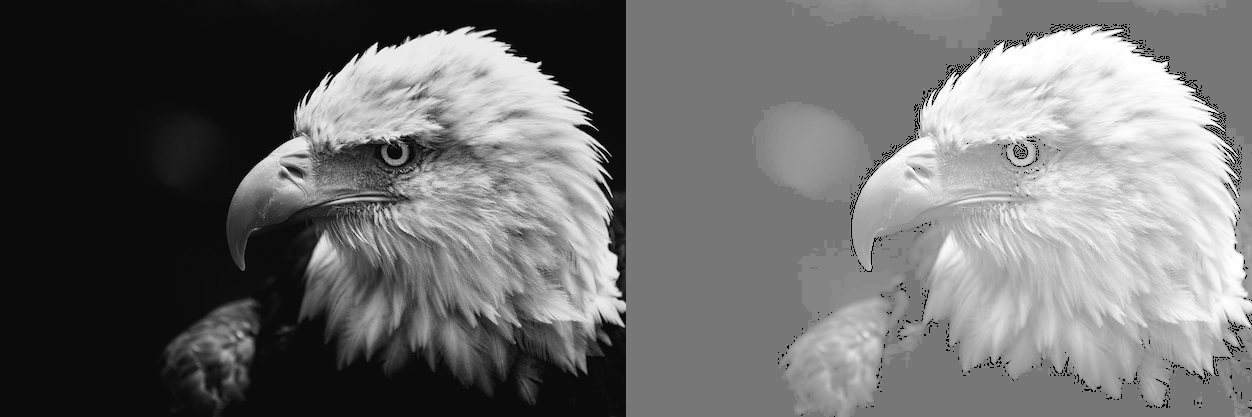

In [85]:
# import OpenCV
import cv2

# import Numpy
import numpy as np

# import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow  # Import the correct function

# read image
image = cv2.imread('bird.jpg', 0)

# creating a Histogram Equalization of the image using cv2.equalizeHist()
equ = cv2.equalizeHist(image)

# stacking original and equalized images side-by-side
res = np.hstack((image, equ))

# show image input vs output using cv2_imshow instead of cv2.imshow
cv2_imshow(res)  # Use cv2_imshow to display the image

c. Filtering di Domain Frekuensi menggunakan Gaussian Filtering

In [86]:
# get image from link google image
import urllib.request
urllib.request.urlretrieve(
    'https://img.freepik.com/free-photo/closeup-grayscale-shot-american-bald-eagle-dark-background_181624-31795.jpg', 'bird.jpg'
), # link from google image

# img = Image.open("gfg.png") #load image filename

(('bird.jpg', <http.client.HTTPMessage at 0x7ce2f706f100>),)

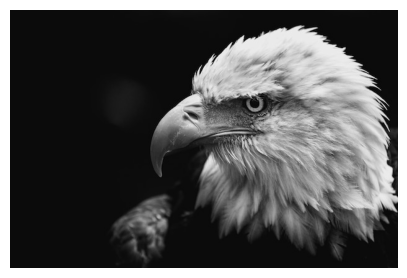

In [87]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image f
f = cv2.imread('bird.jpg',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

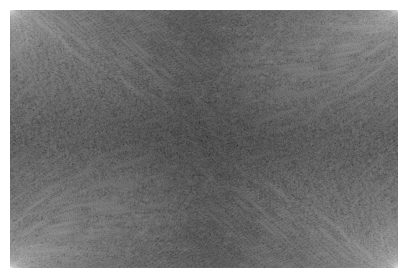

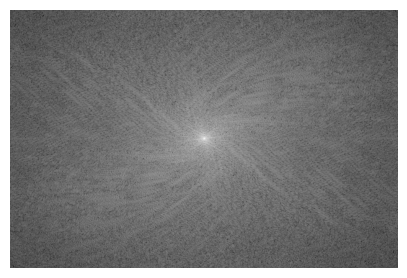

In [88]:
# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

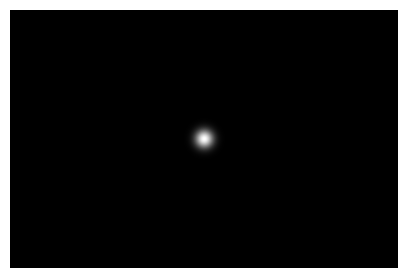

In [89]:
# Create Gaussian Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

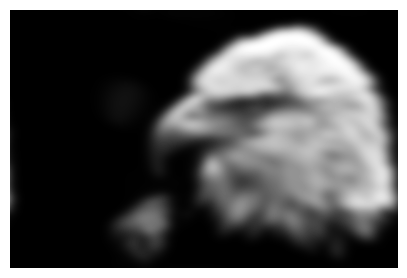

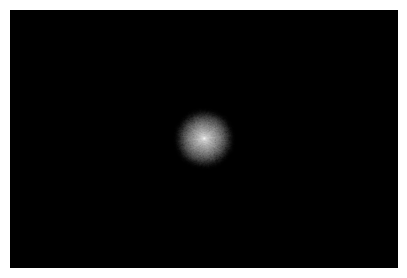

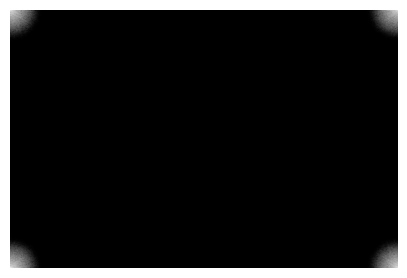

In [90]:
# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

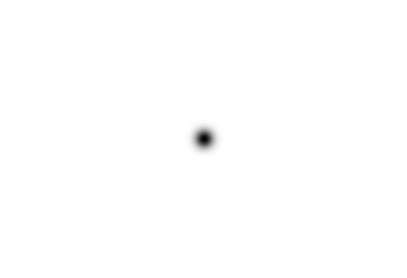

In [91]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

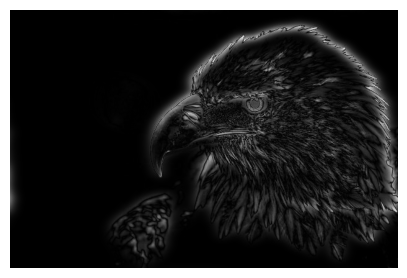

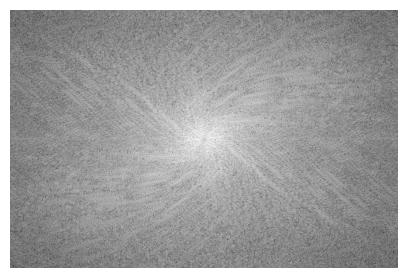

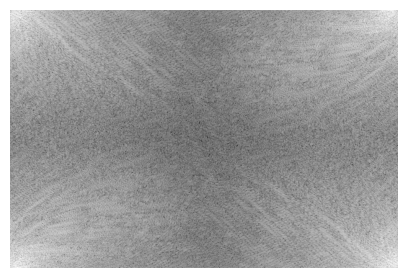

In [92]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()


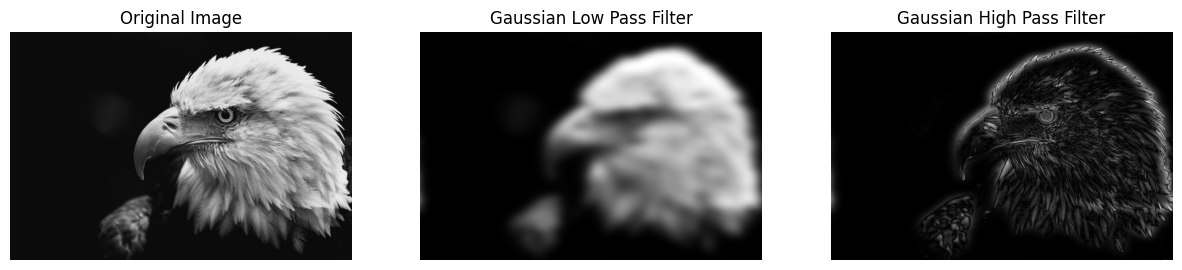

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
f = cv2.imread('bird.jpg', 0)

# Perform Fourier Transform
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

# Create Gaussian Low Pass Filter
M, N = f.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 10  # Cutoff frequency
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
        H[u, v] = np.exp(-D ** 2 / (2 * D0 ** 2))

# Apply Gaussian LPF
Gshift_low = Fshift * H
G_low = np.fft.ifftshift(Gshift_low)
g_low = np.abs(np.fft.ifft2(G_low))

# Create Gaussian High Pass Filter
HPF = 1 - H

# Apply Gaussian HPF
Gshift_high = Fshift * HPF
G_high = np.fft.ifftshift(Gshift_high)
g_high = np.abs(np.fft.ifft2(G_high))

# Display the original and filtered images
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(g_low, cmap='gray')
plt.title('Gaussian Low Pass Filter')
plt.axis('off')

plt.subplot(133)
plt.imshow(g_high, cmap='gray')
plt.title('Gaussian High Pass Filter')
plt.axis('off')

plt.show()

Soal nomor 2 a. Memuat Gambar Grayscale dari Link

In [94]:
# get image from link google image
import urllib.request
urllib.request.urlretrieve(
    'https://media.istockphoto.com/id/930984620/id/foto/pohon-musim-dingin-yang-membayar.jpg?s=612x612&w=0&k=20&c=IWmUycP4Ry8JHc7CWMNb2xLl_vgT8iMI7rUZZIr9GMI=', 'tree.jpg'
), # link from google image

# img = Image.open("gfg.png") #load image filename

(('tree.jpg', <http.client.HTTPMessage at 0x7ce2f7a38be0>),)

Resolusi gambar: 408x612 piksel


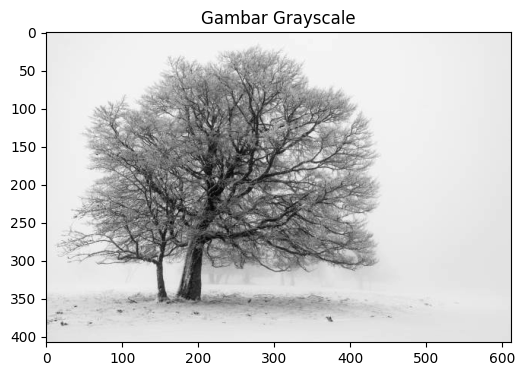

In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

b. Spatial Filtering

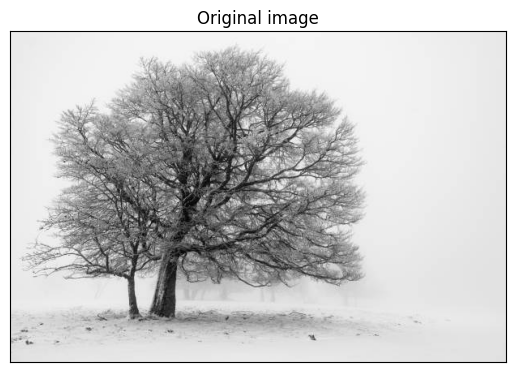

In [96]:
ref = cv2.imread('tree.jpg')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('Original image')
plt.xticks([])
plt.yticks([])
plt.show()

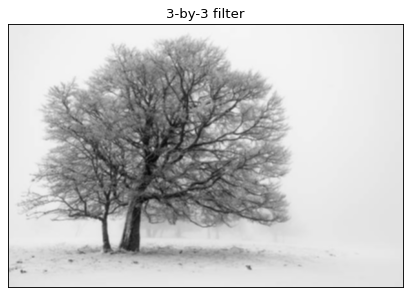

In [97]:
# Defining a kernel using numpy.
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

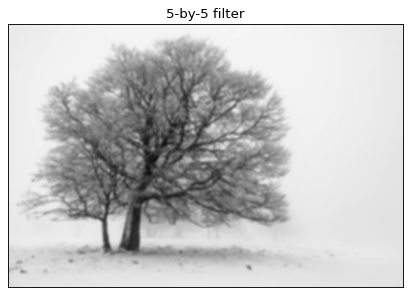

In [98]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

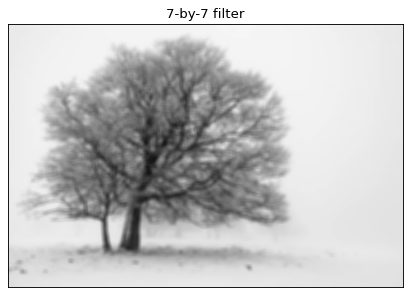

In [99]:
# Defining a kernel using numpy.
kernel_7 = np.ones((7,7),np.float32)/49

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_7 = cv2.filter2D(ref,-1,kernel_7)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

Perbedaannya : Filter 3x3 memberikan hasil yang lebih tajam dibandingkan dengan filter 5x5 dan 7x7, sedangkan filter 5x5 dan 7x7 menghasilkan gambar yang jauh lebih halus (blur).

c. Tampilkan dan Bandingkan Hasil

([], [])

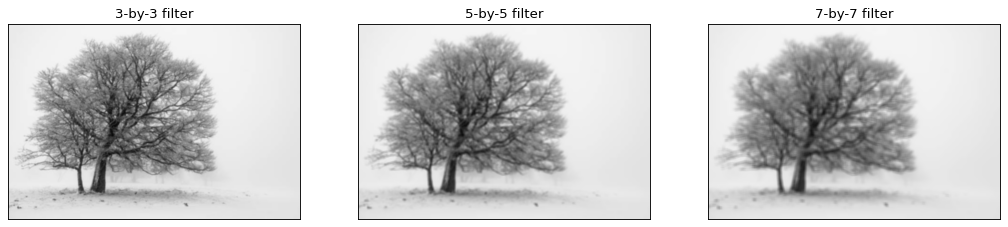

In [100]:
# Defining a kernel using numpy.
kernel_7 = np.ones((7,7),np.float32)/49
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9


# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_7 = cv2.filter2D(ref,-1,kernel_7)
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(133), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

Perbandingan yang dapat dilihat dari Spatial Filtering(Averaging Filter) dengan ukuran kernel 3x3, 5x5, dan 7x7 terletak pada tingkat kehalusan (blur) dan area pengaruh setiap filter terhadap gambar. Semakin besar ukuran kernel, semakin tinggi efek penghalusan yang diterapkan pada gambar. Filter dengan kernel yang lebih besar akan memberikan efek blur yang lebih kuat karena lebih banyak piksel yang dipertimbangkan dalam rata-rata.Filter 3x3 memberikan hasil yang lebih tajam dibandingkan dengan filter 5x5 dan 7x7, sedangkan filter 7x7 menghasilkan gambar yang jauh lebih halus (blur).

